# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different features of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [2]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [3]:
#copying data to avoid any changes to original data
data = hotel.copy()

In [4]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 36275 rows and 19 columns.


In [5]:
# let's view a sample of the data
data.sample(
    20, random_state=2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
3281,INN03282,2,0,2,3,Meal Plan 1,0,Room_Type 1,303,2018,8,19,Offline,0,0,0,78.00000,1,Not_Canceled
27326,INN27327,2,0,1,1,Not Selected,0,Room_Type 1,91,2018,4,9,Online,0,0,0,58.90000,1,Not_Canceled
22178,INN22179,2,0,0,2,Not Selected,0,Room_Type 1,0,2018,4,7,Online,0,0,0,89.00000,1,Not_Canceled
16974,INN16975,2,0,0,2,Meal Plan 1,0,Room_Type 1,93,2017,7,23,Online,0,0,0,76.50000,1,Canceled
6931,INN06932,2,0,0,1,Meal Plan 1,0,Room_Type 4,88,2018,8,19,Online,0,0,0,131.40000,2,Not_Canceled
26515,INN26516,1,0,0,1,Meal Plan 1,1,Room_Type 1,0,2018,3,10,Corporate,0,0,0,50.00000,1,Not_Canceled
1652,INN01653,2,0,0,2,Meal Plan 2,0,Room_Type 1,377,2018,10,14,Online,0,0,0,115.00000,1,Canceled
3902,INN03903,2,0,1,5,Meal Plan 1,0,Room_Type 4,113,2018,7,5,Online,0,0,0,92.94000,0,Not_Canceled
2454,INN02455,2,0,0,2,Meal Plan 1,0,Room_Type 1,19,2018,2,12,Online,0,0,0,91.00000,1,Canceled
29814,INN29815,2,0,2,5,Meal Plan 1,0,Room_Type 1,118,2018,9,3,Offline,0,0,0,99.28000,0,Not_Canceled


* For now no values seem to be missing. We will investigate this later.

* Columns are formatted correctly.

In [6]:
# checking for duplicate values in the data
data.duplicated().sum()

0

* There are no duplicate values in the data.

In [7]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* There are 14 numeric (*float* and *int* type) and  5 string (*object* type) columns in the data.
* There are no null values in the dataset.

In [8]:
# Let's look at the statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000


* Mean number of adults per booking is 1.8
* Mean number of children per booking is 0.1
* Mean number of weekend nights per booking is 0.8
* Mean number of week nights per booking is 2.2
* On average customers make their booking 85.2 days in advance. Some bookings are made on the day and some are made over one year in advance.
* Most bookings are made by "new" customers
* Average price per room is 103.4 euros

In [9]:
# Dropping the columns with all unique values
data = data.drop(["Booking_ID"], axis=1)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [13]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

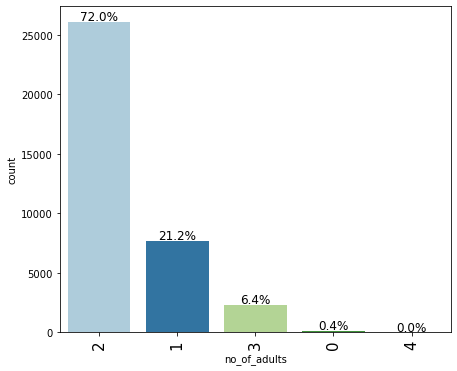

In [14]:
#Number of adults
labeled_barplot(data,"no_of_adults", perc=True)

* The majority of bookings include 2 adults. Followed by 1 adult.
* No bookings include 4 adults.

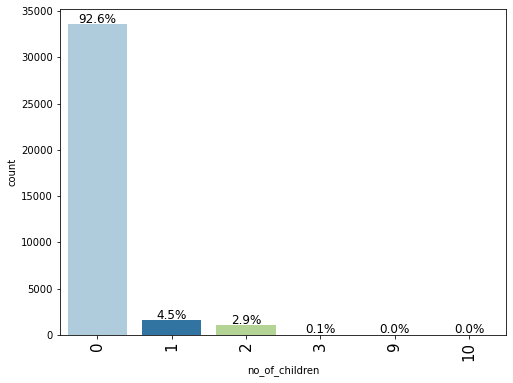

In [15]:
#Number of children
labeled_barplot(data,"no_of_children", perc=True)

* The majority of bookings do not include children. Followed by one child.

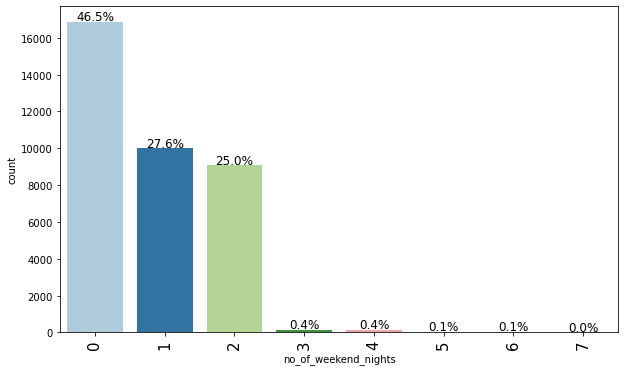

In [16]:
#Number of weekend nights
labeled_barplot(data,"no_of_weekend_nights", perc=True)

* Most bookings do not include weekend nights. 
* Some bookings include 1 or 2 weekend nights.
* Very few include more than 2 weekend nights.

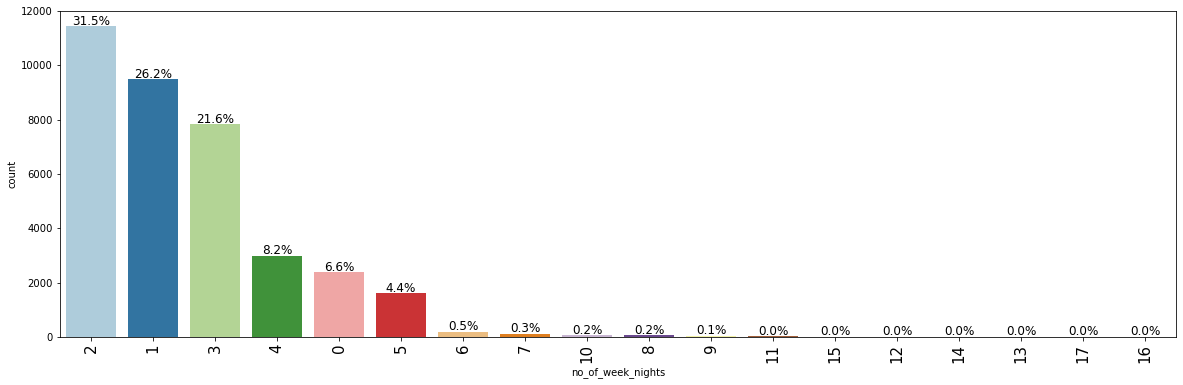

In [17]:
#Number of week nights
labeled_barplot(data,"no_of_week_nights", perc=True)

* Most bookings include 2 week nights. Followed by 1 week night. Therefore most bookings are for a few nights only.
* Some bookings are on weekend nights only. 6.6%

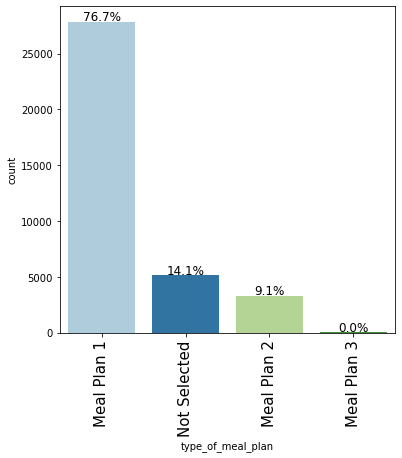

In [18]:
#Meal plan type
labeled_barplot(data,"type_of_meal_plan", perc=True)

* Most people select meal plan 1 (Breakfast included)
* The least common choice is meal plan 3 (Breakfast, lunch, and dinner)

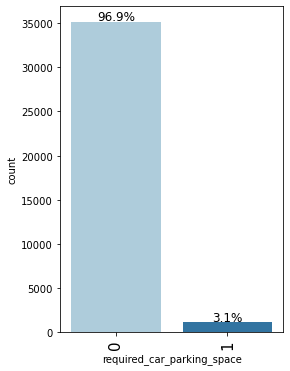

In [19]:
#Parking space requirements
labeled_barplot(data,"required_car_parking_space", perc=True)

* Most people do not require a parking space.

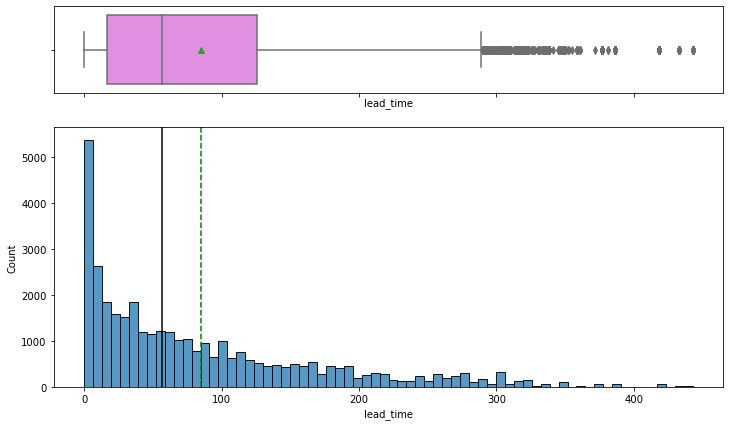

In [20]:
#Advanced booking
histogram_boxplot(data,"lead_time")

* Right skewed distribution
* Bookings are made anywhere between 0 days and over 400 days
* Many bookings are made less than 10 days before
* There are many outliers on the right end of the box plot

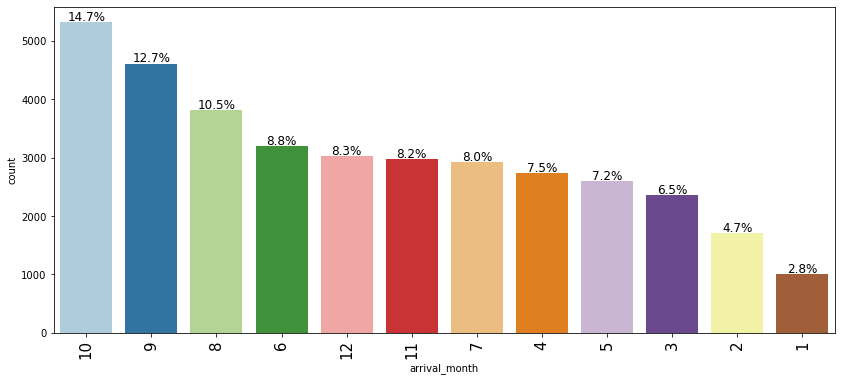

In [21]:
#Arrival month
labeled_barplot(data,"arrival_month", perc=True)

* The most popular month is October.
* The second most popular is September
* The third most popular is August
* The least popular month is Janaury

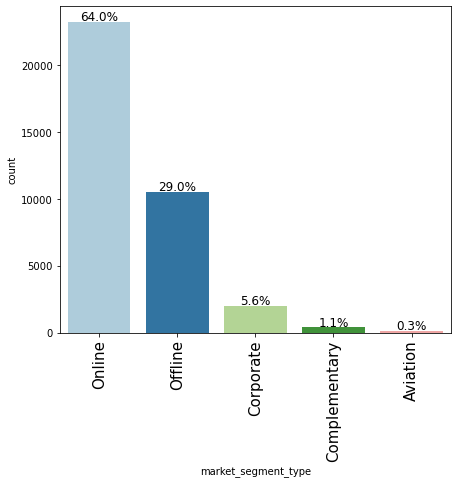

In [22]:
#Market segment type
labeled_barplot(data,"market_segment_type",perc=True)

* Most customers come from online market segment.
* The second most common is from offline market segment.
* The third most common is from corporate market segment.

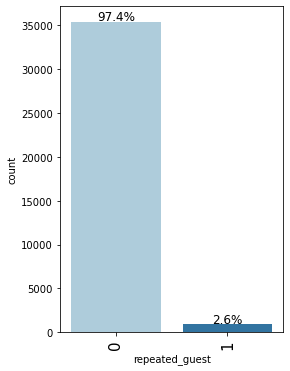

In [23]:
#Repeated guest
labeled_barplot(data,"repeated_guest",perc=True)

* Most customers are not repeating guests

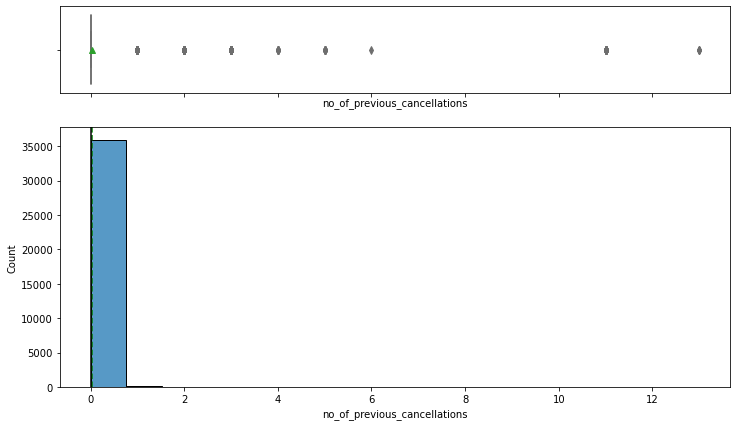

In [24]:
#Number of previous cancellations
histogram_boxplot(data,"no_of_previous_cancellations")

* Most customers do not cancel prior to the current booking.
* Some customers have cancelled bookings before (ranging between 1 to 13 times).
* Distribution is right skewed
* There are many outliers on the right end of the box plot

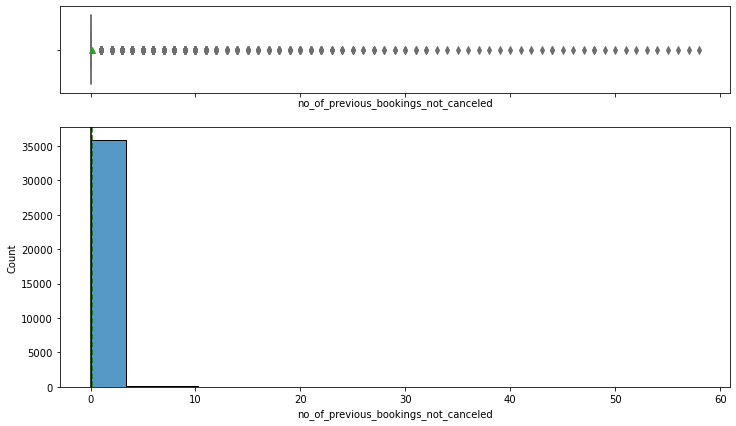

In [25]:
#Number of previous bookings not canceled
histogram_boxplot(data,"no_of_previous_bookings_not_canceled")

* Most customers have not canceled before. This is most likely because these are first time users.

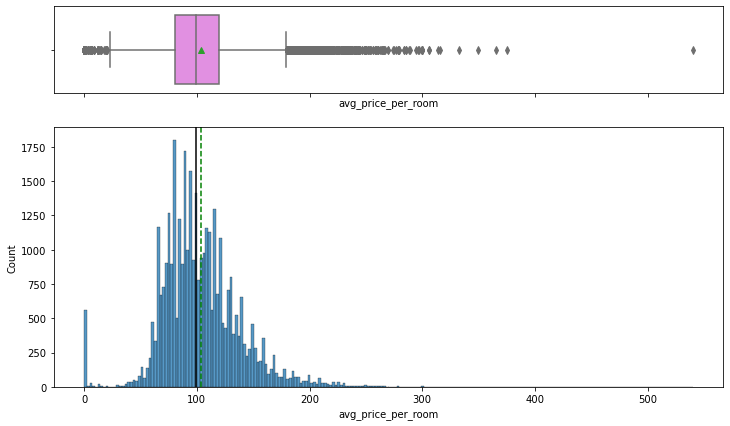

In [26]:
#Average price per room
histogram_boxplot(data,"avg_price_per_room")

* There are some values priced 0. This needs to be corrected.

In [27]:
#Replacing 0 values with median price
avg_price_median = data["avg_price_per_room"].median()
data["avg_price_per_room"] = data["avg_price_per_room"].replace(0,avg_price_median)

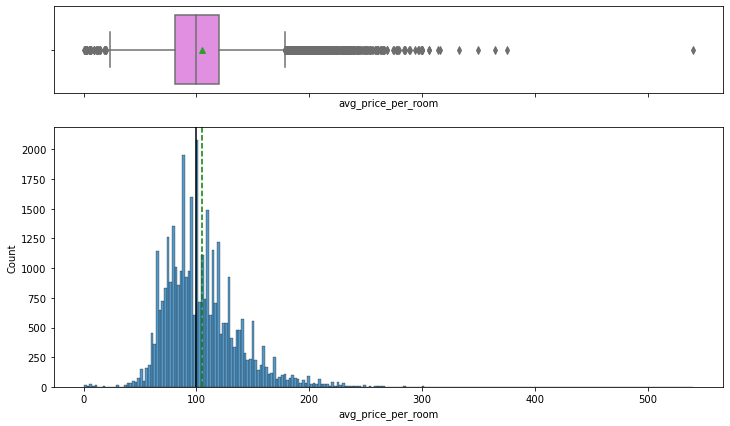

In [28]:
histogram_boxplot(data,"avg_price_per_room")

* Distribution is right skewed
* Median price is around 100 euros
* There are outliers on both ends of the box plot. Especially on the right end.

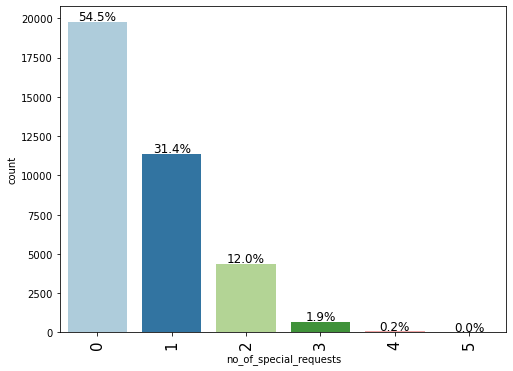

In [30]:
#Number of special requests
labeled_barplot(data,"no_of_special_requests", perc=True)

* Most custmers do not make any special requests.
* Some customers make between 1 - 5 requests.

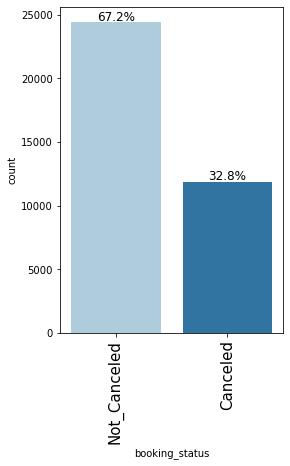

In [31]:
#Booking status
labeled_barplot(data,"booking_status",perc=True)

* Most bookings are not cancelled. However 32.8% of bookings are canceled. This number is high.

In [32]:
# Replacing Booking_status values with 0's (not canceled) and 1's (canceled)
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0)

**Leading Questions**:

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Bivariate Analysis

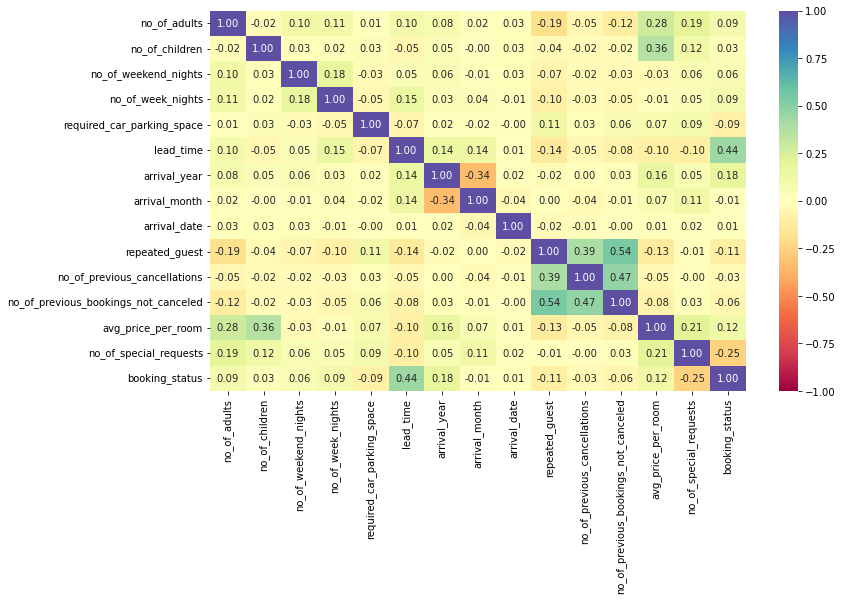

In [33]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are no strongly correlated patterns between any of the features

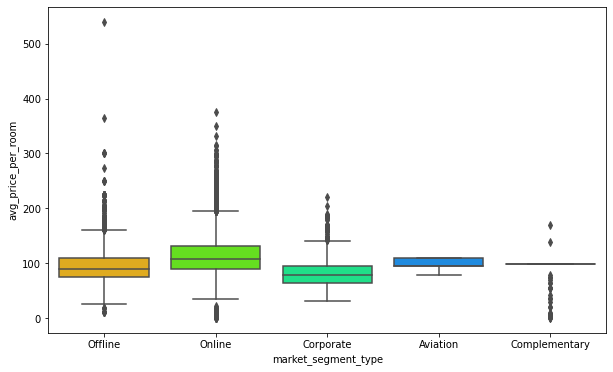

In [34]:
#Comparing market segment type with average price per room
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* With the exception on "Complementary" market segment type, the medians of the other types are relatively the same. "Complementary" median is lower. 
* Offline, Online, Corporate, and Complementary have many outliers.
* Offline and Online have the widest ranges in average price per room. 

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


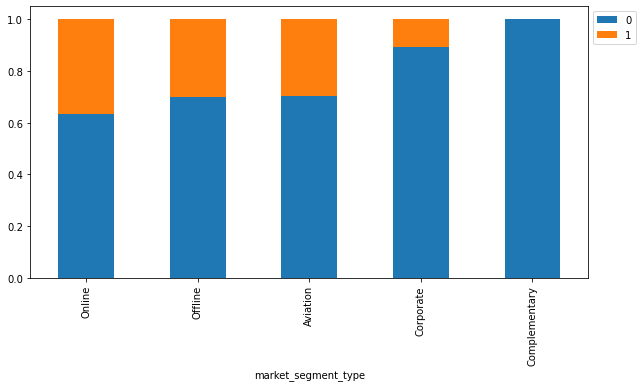

In [35]:
#Comparing market segment type and booking status
stacked_barplot(data, "market_segment_type", "booking_status")

* Most cancelations come from online customers
* Second is from offline customers
* Online customers are more likely to cancel compared to other market segment types
* Complementary customers have 0 cancellations

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


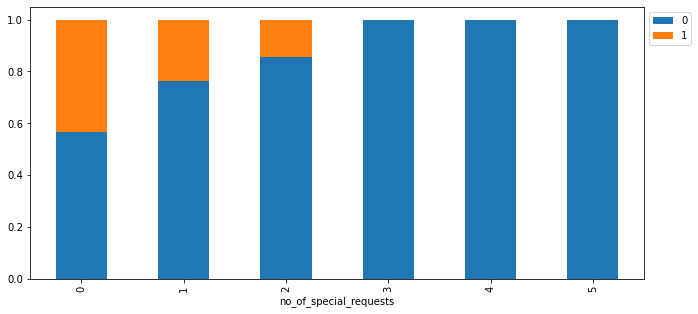

In [36]:
#Comparing number of special requests and booking status
stacked_barplot(data,"no_of_special_requests","booking_status")

* Most cancelations come from customers who have no special requests.
* Second is customers who have one special request
* On average the more special requests a customers has, the less likely they are to cancel.

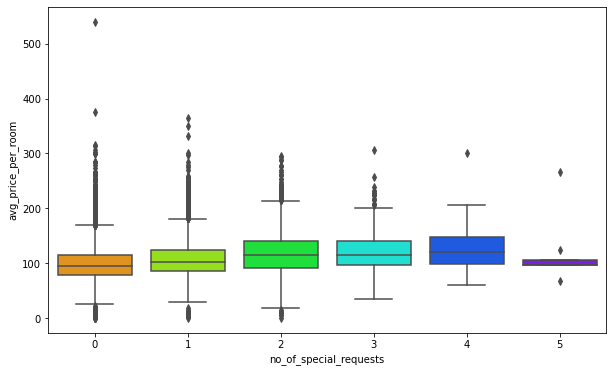

In [37]:
#Comparing number of special requests and average room price
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* With the exception of 5 special requests, the median price per room goes slighly up the more special requests are made. 
* However the ranges are wide and there are several outliers.

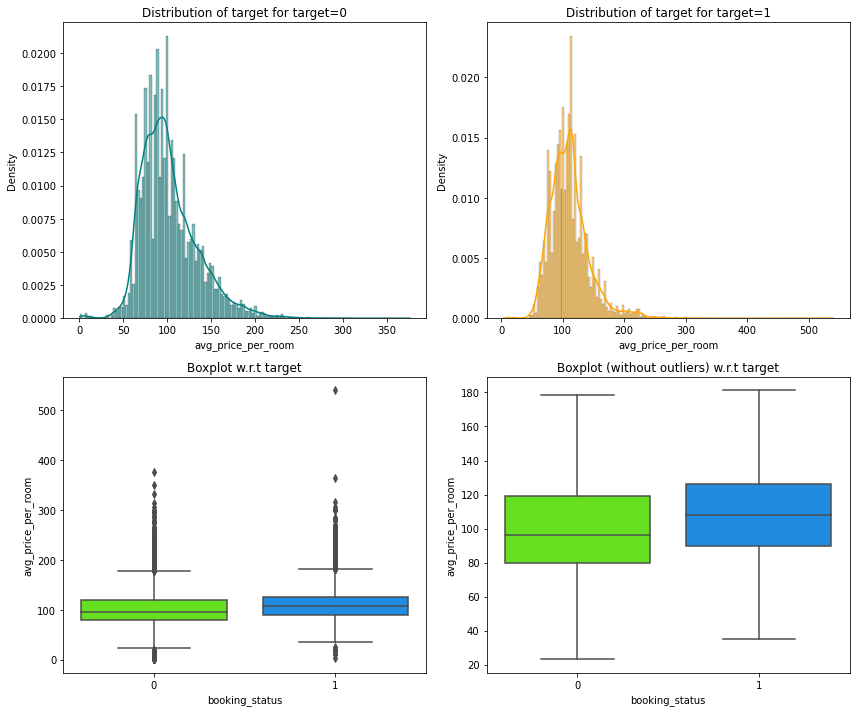

In [38]:
#Comparing average price per room and booking status
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* Trends in the distributions are similiar. Both distributions are right tailed.
* Median price per room is slightly higher for bookings which were cancelled. Overal however, the room price does not seem to have an impact on booking cancelations.
* There are outliers for both boxplots. 

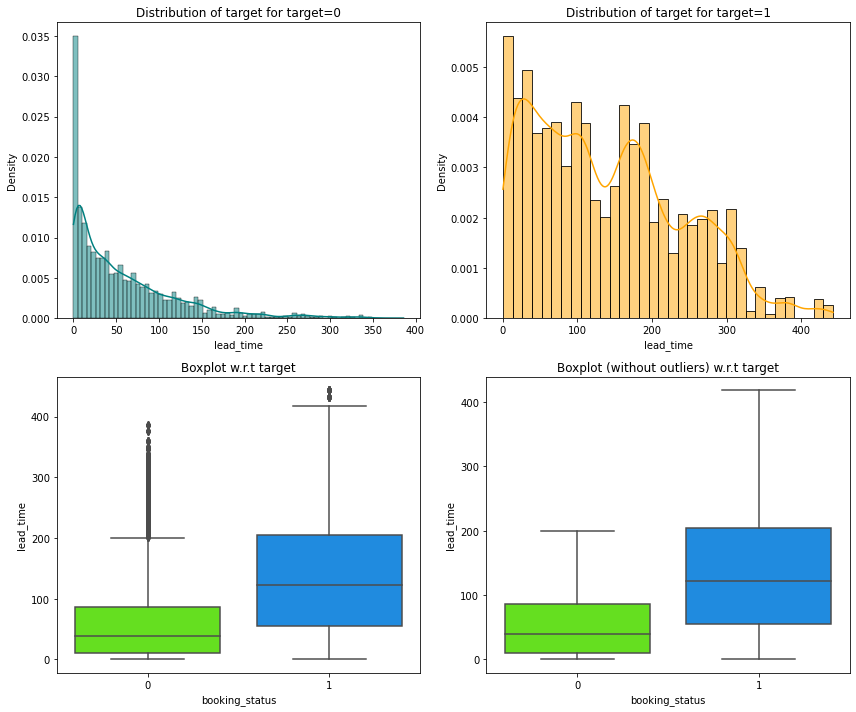

In [39]:
#Comparing lead time and booking status
distribution_plot_wrt_target(data, "lead_time","booking_status")

* Both distributions are right tailed. However the none canceled bookings displays a stronger right tailed distribution.
* Median lead time is less for none cancelations. This means that customers who book earlier are more likely to cancel before the arrival date.
* There are outliers for both boxplots. However the none canceled box plot has many more outliers.  

booking_status            0      1    All
no_of_family_members                     
All                   24390  11885  36275
2                     15662   8280  23942
1                      5743   1809   7552
3                      2459   1392   3851
4                       514    398    912
5                        10      5     15
11                        0      1      1
10                        1      0      1
12                        1      0      1
------------------------------------------------------------------------------------------------------------------------


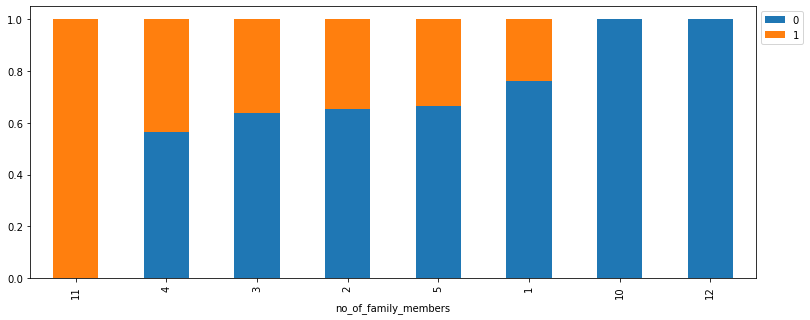

In [40]:
#Comparing number of family members and booking status
#First we need to sum up the number of adults and number of children per booking
data["no_of_family_members"] = (data["no_of_adults"] + data["no_of_children"])

stacked_barplot(data,"no_of_family_members","booking_status")

In [41]:
#Checking family members greater than 10
data[(data["no_of_family_members"] == 10) | (data["no_of_family_members"] == 11) | (data["no_of_family_members"] == 12)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_family_members
6338,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45000,1,0,12
10041,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.00000,0,0,10
10061,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.50000,1,1,11


* From 1 family member to 4 family members, the odds of cancelation become progressively more likely.
* There is only 1 family with 10 members, 1 family with 11 members, and 1 family with 12 members. Therefore these values are special cases and should not be interpretered to make deductions about the whole dataset. 

booking_status      0      1    All
no_of_nights                       
All             24390  11885  36275
3                6466   3586  10052
2                5573   2899   8472
4                3952   1941   5893
1                5138   1466   6604
5                1766    823   2589
6                 566    465   1031
7                 590    383    973
8                 100     79    179
10                 51     58    109
9                  58     53    111
14                  5     27     32
15                  5     26     31
13                  3     15     18
12                  9     15     24
11                 24     15     39
20                  3      8     11
16                  1      5      6
19                  1      5      6
17                  1      4      5
18                  0      3      3
21                  1      3      4
22                  0      2      2
0                  76      2     78
23                  1      1      2
24                  0      1

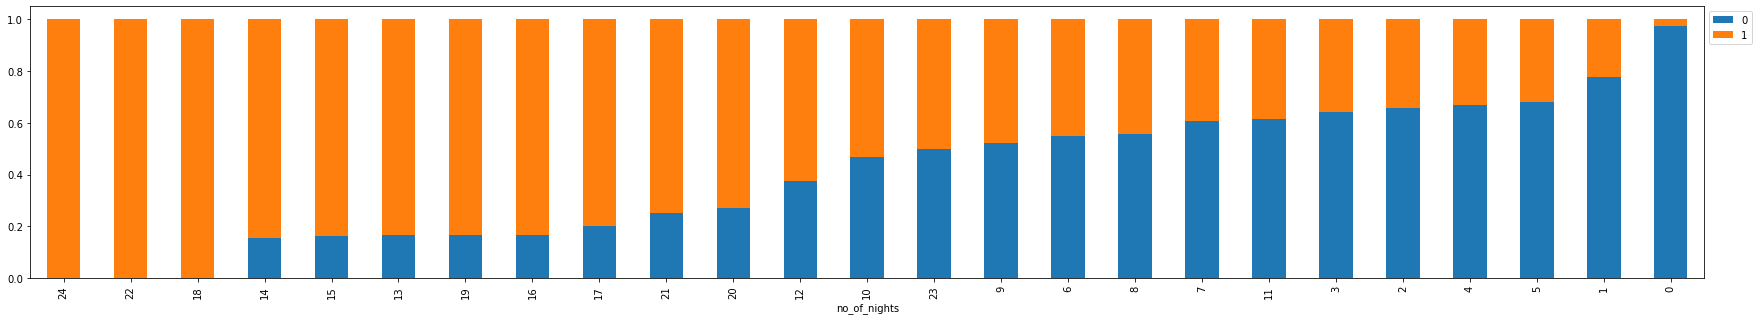

In [42]:
#Comparing number of nights and booking status
#First we need to sum up the number of adults and number of children per booking
data["no_of_nights"] = (data["no_of_week_nights"] + data["no_of_weekend_nights"])

stacked_barplot(data,"no_of_nights","booking_status")

* On average, the longer the planned stay, the more likely they were to cancel.
* Customers who only booked one night were the least likely to cancel.

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


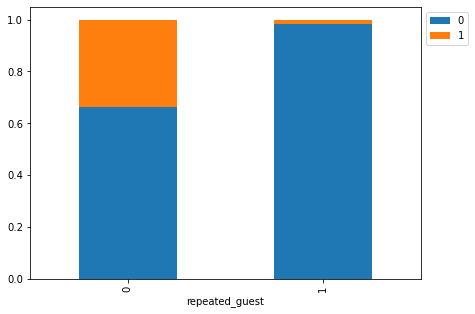

In [43]:
#Comparing repeating guests and booking status
stacked_barplot(data,"repeated_guest","booking_status")

* Repated guests are less likely to cancel their bookings.

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


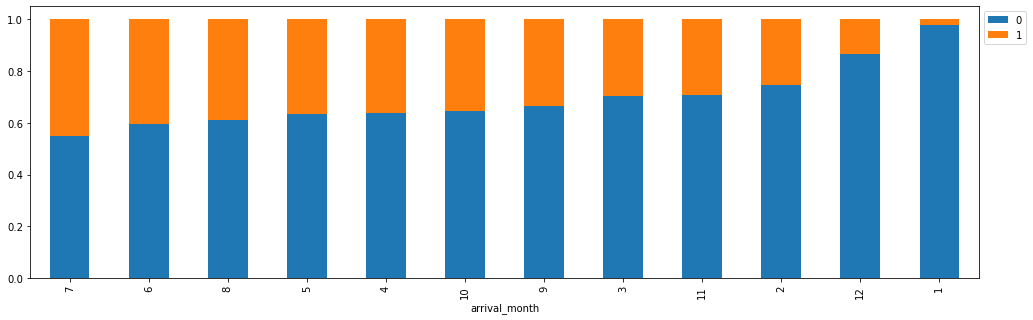

In [44]:
#Comparing month and booking status
stacked_barplot(data,"arrival_month","booking_status")

* The highest number of cancelations happen in October
* The highest percentage of cancelations happen in July. Second is June.
* The lowest percentage of cancelations happen in Janaury.

<AxesSubplot:xlabel='arrival_month', ylabel='avg_price_per_room'>

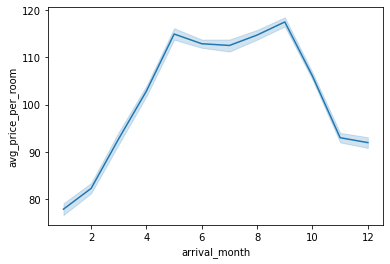

In [45]:
sns.lineplot(data=data,x="arrival_month",y="avg_price_per_room")

* Booking prices change depending on the month
* Booking prices are highest during months of April to October. Especially between May and September
* Booking prices are lowest in Janaury

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [46]:
#Checking for missing values
data.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
no_of_family_members                    0
no_of_nights                            0
dtype: int64

* There are no missing values

* No feature engineering needed

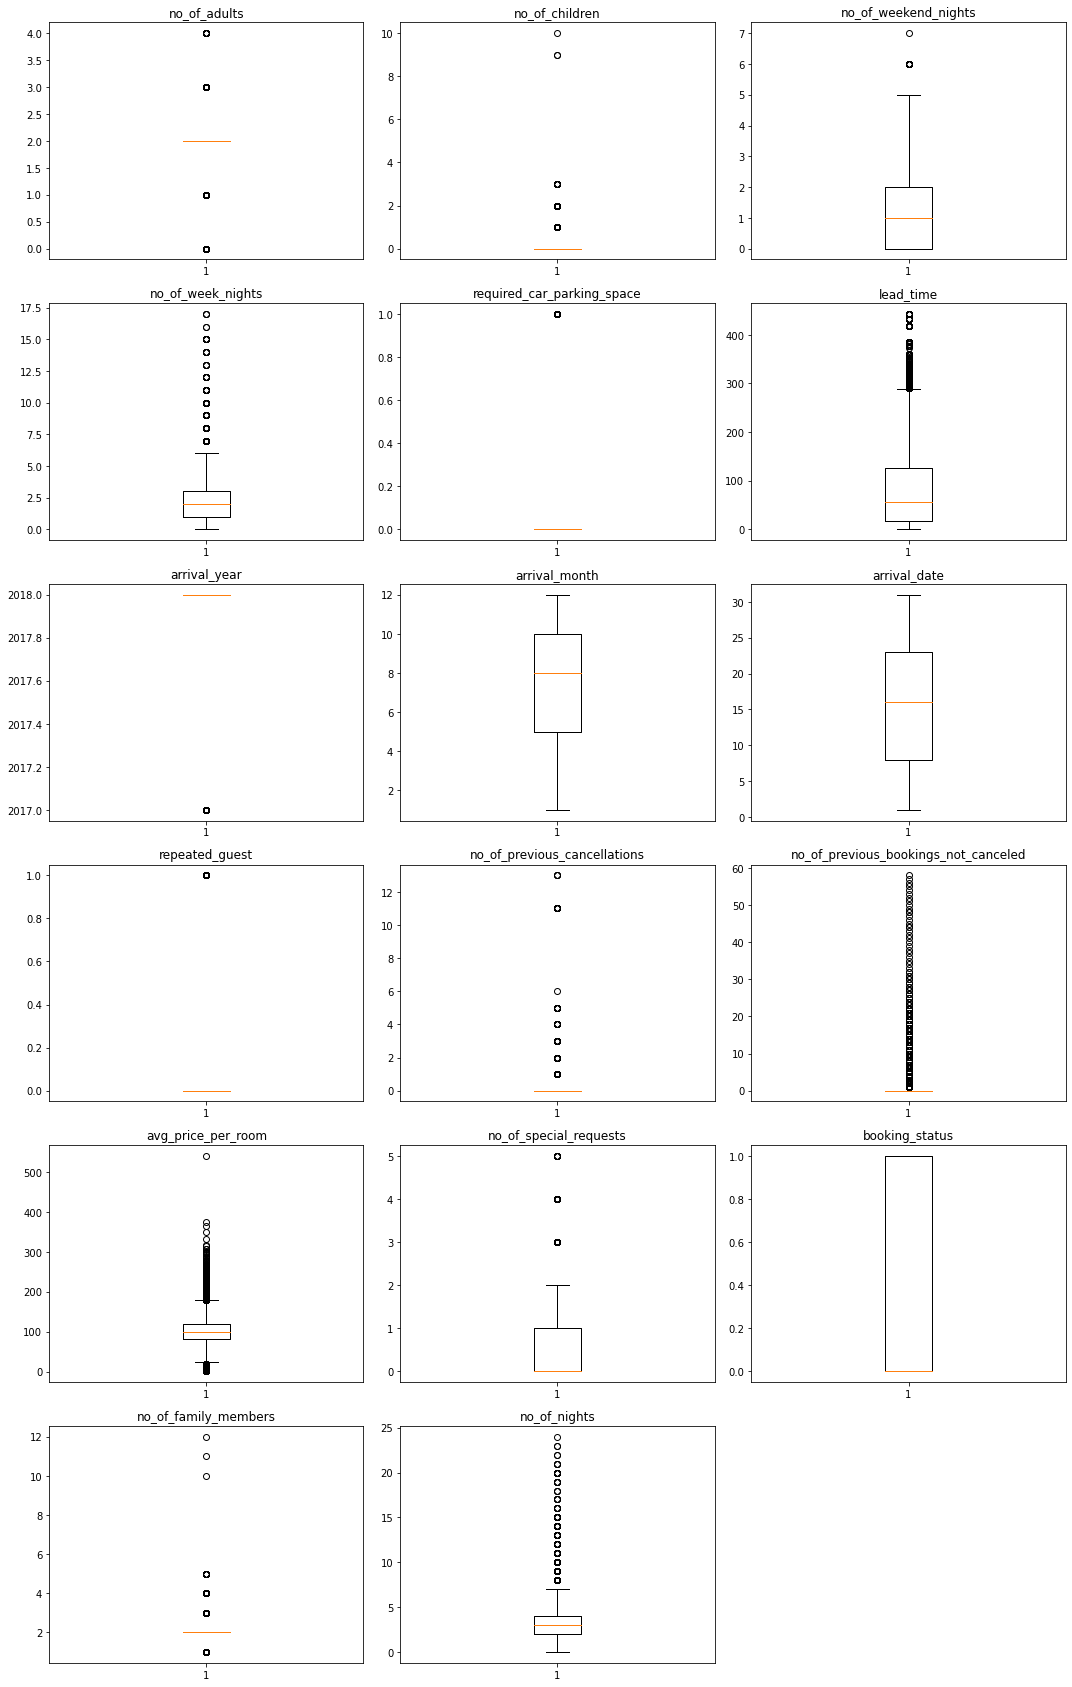

In [47]:
# Outlier detection
# creating a list of non-tag columns
out_cols = [
    item for item in data.select_dtypes(include=np.number).columns if "tag" not in item
]

plt.figure(figsize=(15, 35))

for i, variable in enumerate(out_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

In [48]:
# Preparing data for modeling
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [49]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 30)
Shape of test set :  (10883, 30)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


* We had seen that around 67.2% of observations belongs to class 0 (Not canceled) and 32.8% observations belongs to class 1 (canceled), and this is preserved in the train and test sets.

* No data manipulation was needed. We can move on to the next stage of the analysis. 

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [50]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                  39340670.77352
no_of_adults                                      inf
no_of_children                                    inf
no_of_weekend_nights                              inf
no_of_week_nights                                 inf
required_car_parking_space                    1.03939
lead_time                                     1.40140
arrival_year                                  1.42623
arrival_month                                 1.28092
arrival_date                                  1.00673
repeated_guest                                1.78279
no_of_previous_cancellations                  1.39574
no_of_previous_bookings_not_canceled          1.65179
avg_price_per_room                            1.96655
no_of_special_requests                        1.24684
no_of_family_members                              inf
no_of_nights                                      inf
type_of_meal_plan_Meal Plan 2                 1.29075
type_of_meal_p

* Some of the features have moderate and high multicollinearity (greater than 5).
* We will therefore remove multicollinearity where necessary.

In [51]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [52]:
col_list = [
    "no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights",
    "no_of_family_members","no_of_nights","market_segment_type_Corporate",
    "market_segment_type_Offline","market_segment_type_Online", 
]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,market_segment_type_Online,0.34281,0.38101
1,no_of_children,0.34279,0.38101
2,no_of_week_nights,0.34279,0.38101
3,no_of_family_members,0.34279,0.38101
4,no_of_adults,0.34279,0.38101
5,no_of_weekend_nights,0.34279,0.38101
6,no_of_nights,0.34279,0.38101
7,market_segment_type_Corporate,0.34255,0.38108
8,market_segment_type_Offline,0.34180,0.38130


* Dropping market segment type Offline would have the maximum impact on the model.
* We will drop market segment type Online and check again.

In [53]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39259677.51977
no_of_adults                                      inf
no_of_children                                    inf
no_of_weekend_nights                              inf
no_of_week_nights                                 inf
required_car_parking_space                    1.03925
lead_time                                     1.39692
arrival_year                                  1.42363
arrival_month                                 1.27978
arrival_date                                  1.00671
repeated_guest                                1.77952
no_of_previous_cancellations                  1.39549
no_of_previous_bookings_not_canceled          1.65155
avg_price_per_room                            1.96523
no_of_special_requests                        1.24198
no_of_family_members                              inf
no_of_nights                                      inf
type_of_meal_plan_Meal Plan 2                 1

* Dropping market segment type Online has brought the VIF of the other market segment types below 5.

In [54]:
col_list = [
    "no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights",
    "no_of_family_members","no_of_nights", 
]

res = treating_multicollinearity(X_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,no_of_nights,0.34281,0.38101
1,no_of_adults,0.34281,0.38101
2,no_of_week_nights,0.34281,0.38101
3,no_of_family_members,0.34281,0.38101
4,no_of_children,0.34281,0.38101
5,no_of_weekend_nights,0.34281,0.38101


* Dropping number of weekend nights would have the maximum impact on the model.
* We will drop both number of nights and number of family members since these two columns were created for the visualizations.

In [55]:
X_train2 = X_train1.drop("no_of_nights", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)

In [56]:
X_train3 = X_train2.drop("no_of_family_members", axis=1)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

const                                  39259677.51977
no_of_adults                                  1.32667
no_of_children                                1.97600
no_of_weekend_nights                          1.07275
no_of_week_nights                             1.09797
required_car_parking_space                    1.03925
lead_time                                     1.39692
arrival_year                                  1.42363
arrival_month                                 1.27978
arrival_date                                  1.00671
repeated_guest                                1.77952
no_of_previous_cancellations                  1.39549
no_of_previous_bookings_not_canceled          1.65155
avg_price_per_room                            1.96523
no_of_special_requests                        1.24198
type_of_meal_plan_Meal Plan 2                 1.29030
type_of_meal_plan_Meal Plan 3                 1.02515
type_of_meal_plan_Not Selected                1

* The above predictors have no multicollinearity and the assumption is satisfied.

## Building a Logistic Regression model

In [57]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train3.astype(float))
lg = logit.fit()

         Current function value: 0.426712
         Iterations: 35


In [58]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.3267
Time:                        23:22:18   Log-Likelihood:                -10835.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1001.3766    120.494     -8.311      0.000   -1237.540    -765.213
no_of_adults                             0.1254      

In [59]:
# Removing insignificant variables (p-value > 0.05 )
X_train4 = X_train3.drop(
    ["arrival_date", "no_of_previous_bookings_not_canceled", "type_of_meal_plan_Meal Plan 3", "room_type_reserved_Room_Type 3","market_segment_type_Complementary"], axis=1
)

logit2 = sm.Logit(y_train, X_train4.astype(float))
lg2 = logit2.fit()

print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.428152
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.3244
Time:                        23:22:18   Log-Likelihood:                -10872.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1010.2513    120.005     -8.418    

* Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train4* as the final ones and *lg2* as final model.

## Model performance evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a customer will not cancel but in reality, the customer will cancel (FN)
- Predicting a customer will cancel but in reality, the customer will not cancel (FP)

**Which case is more important?**

- Both are important.
- Customers who are predicted to keep their booking but who unexpectdily cancel, is extremely costly for the hotel. 
- Customers who were expected to cancel but who show up creates additional. For example, the hotel staffing will be insufficient and therefore customer satisfication will be low. Low customer satisfication will have a negative impact on new customers (because of low ratings) and will have a negative impact on returning customers. 

**F1 score**

- For the rest of this analysis we will focus on the F1 score for determining the credibility of the model. The higher the F1 score, the more FN and FP will be minimized. 

In [60]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [61]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [62]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train4.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.14589,1.18514,1.11966,1.04600,0.20683,1.01579,1.64739,0.95906,0.05854,1.26769,1.01865,0.23275,1.18187,1.34869,0.69808,0.77316,0.48565,0.39891,0.24889,0.47610,0.17420
Change_odd%,-100.00000,14.58904,18.51403,11.96588,4.60019,-79.31655,1.57905,64.73879,-4.09374,-94.14648,26.76939,1.86476,-76.72476,18.18673,34.86948,-30.19232,-22.68358,-51.43504,-60.10886,-75.11149,-52.38983,-82.57957


### Coefficient interpretations

* Holding all other features constant, a unit change in these features will increase the odds of a customer cancelling by:
    * Number of adults: 14.6%
    * Number of children: 18.5%
    * Number of weekend nights: 12.0%
    * Number of week nights: 4.6%
    * Lead time: 1.6%
    * Arrival year: 64.7%
    * Number of previous cancellations: 26.8%
    * Average room price: 1.9%
    * Meal plan 2: 18.2%
    * Meal plan not selected: 34.9%
    

* Holding all other features constant, a unit change in these features will decrease the odds of a customer cancelling by:
    * Required car parking space: -79.3%
    * Arrival month: -4.1%
    * Repeated guest: -94.1%
    * Number of special requests: -76.7%
    * Room type 2: -30.2%
    * Room type 4: -22.7%
    * Room type 5: -51.4%
    * Room type 6: -60.1%
    * Room type 7: -75.1%
    * Market segment type Corporate: -52.3%
    * Market segment type Offline: -82.6%

### Let's check the performance on the training set

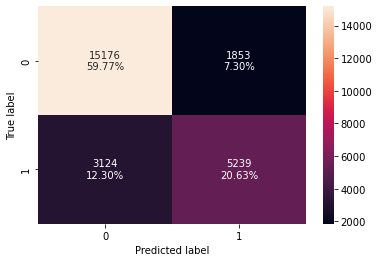

In [63]:
#Creating confusion matrix for training set
confusion_matrix_statsmodels(lg2,X_train4,y_train)

In [64]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train4, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80399,0.62645,0.73872,0.67797


* F1 score is currently at 0.68. Lets try to improve the model for the training set.

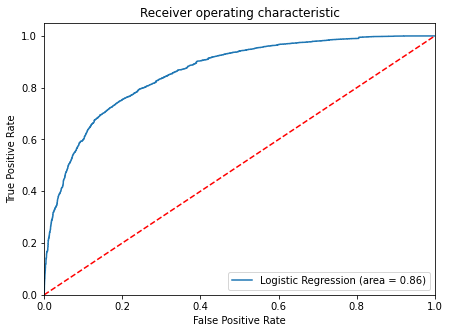

In [65]:
#ROC-AUC on training set
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train4))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

In [66]:
# Optimal threshold as per AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3506293038334823


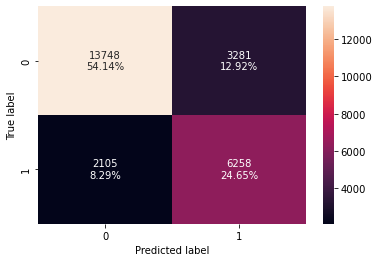

In [67]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train4, y_train, threshold=optimal_threshold_auc_roc
)

In [68]:
# checking model performance for training set
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train4, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78789,0.74830,0.65604,0.69914


* F1 score went from 0.68 to 0.70. A slight improvement. Lets try to improve the model for the training set.

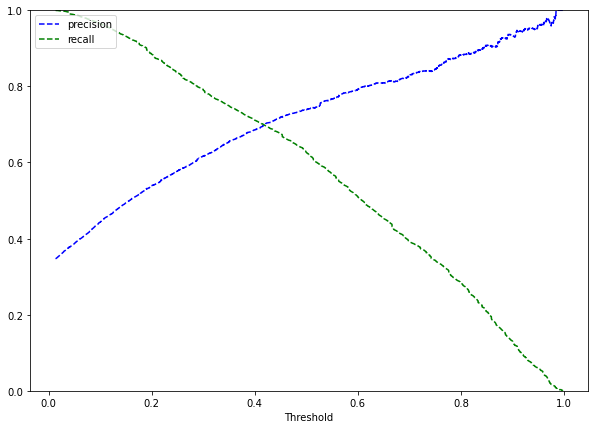

In [69]:
#Using Precision-Recall curve
y_scores = lg2.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.43, we get balanced recall and precision.

In [70]:
# setting the threshold
optimal_threshold_curve = 0.43

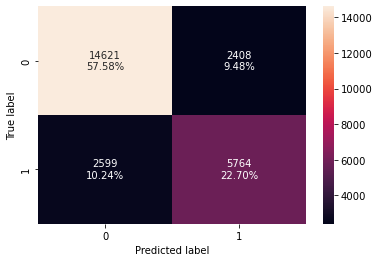

In [71]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train4, y_train, threshold=optimal_threshold_curve)

In [72]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train4, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80281,0.68923,0.70534,0.69719


* No improvement. A threshold of 0.35 seems to be the best fit for the model. 

### Let's check the performance on the test set

In [73]:
# Dropping the columns from the test set that were dropped from the training set
X_test4 = X_test[list(X_train4.columns)]

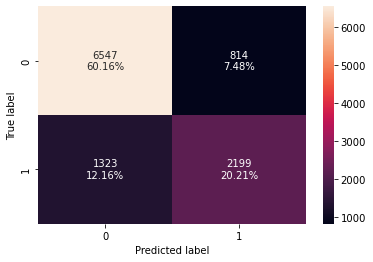

In [74]:
#Creating confusion matrix for training set
confusion_matrix_statsmodels(lg2,X_test4,y_test)

In [75]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_test4, y_test
)

print("Testing performance:")
log_reg_model_train_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.80364,0.62436,0.72984,0.67299


* F1 score is currently at 0.67.
* This is almost the same as the training set. Therefore the model is neither overfitting or underfitting.
* Lets try to improve the model for the test set.

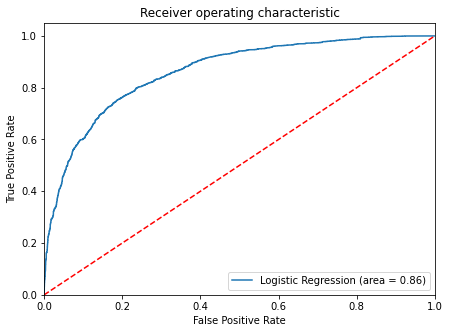

In [76]:
#ROC-AUC on test set
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

In [77]:
# Optimal threshold as per AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3542452981807794


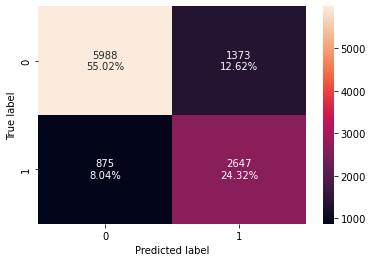

In [78]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_test4, y_test, threshold=optimal_threshold_auc_roc
)

In [79]:
# checking model performance for test set
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test4, y_test, threshold=optimal_threshold_auc_roc
)
print("Testing performance:")
log_reg_model_train_perf_threshold_auc_roc

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.79344,0.75156,0.65846,0.70194


* F1 score has improved from 0.67 to 0.70. Lets try to improve the model further.

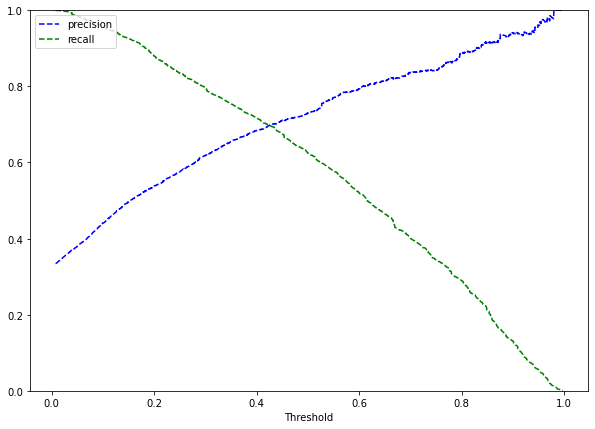

In [80]:
#Using Precision-Recall curve
y_scores = lg2.predict(X_test4)
prec, rec, tre = precision_recall_curve(y_test, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.43, we get balanced recall and precision.

In [81]:
# setting the threshold
optimal_threshold_curve = 0.43

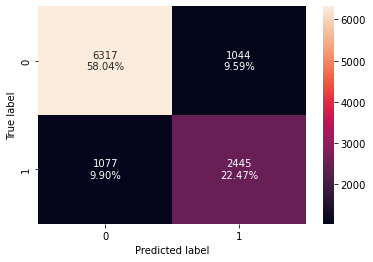

In [82]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test4, y_test, threshold=optimal_threshold_curve)

In [83]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test4, y_test, threshold=optimal_threshold_curve
)
print("Testing performance:")
log_reg_model_train_perf_threshold_curve

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.80511,0.69421,0.70077,0.69748


* Same as with the training set. No improvement to the F1 score when using the precision-recall curve.
* Same as with the test set. No improvement to the F1 score. 
* Therefore a threshold of 0.35 seems to be the best fit for the model.

## Final Model Summary

In [84]:
# Best fit for training set
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train4, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78840,0.74495,0.65787,0.69870


In [85]:
# Best fit for testing set
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test4, y_test, threshold=optimal_threshold_auc_roc
)
print("Testing performance:")
log_reg_model_train_perf_threshold_auc_roc

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.79344,0.75156,0.65846,0.70194


### Comments on logistic regression
* We have been able to build a predictive model that can be used by INNHotels to identify which customers will cancel their bookings with an f1_score of 0.70 on the training set and the test set.

* The optimal threshold (0.35) as per AUC-ROC curve was the best fit for the model.

## Building a Decision Tree model

In [86]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train4, y_train)

DecisionTreeClassifier(random_state=1)

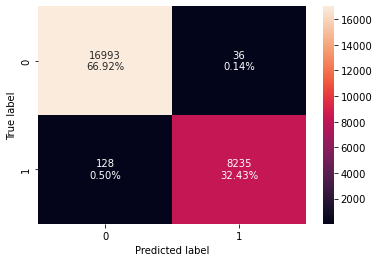

In [87]:
confusion_matrix_statsmodels(model0, X_train4, y_train)

In [88]:
decision_tree_perf_train_without = model_performance_classification_statsmodels(
    model0, X_train4, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.99354,0.98469,0.99565,0.99014


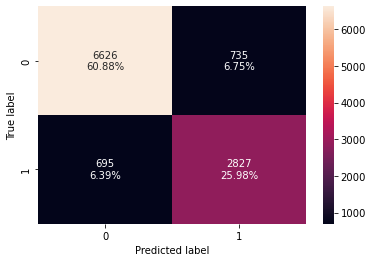

In [89]:
confusion_matrix_statsmodels(model0, X_test4, y_test)

In [90]:
decision_tree_perf_test_without = model_performance_classification_statsmodels(
    model0, X_test4, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.86860,0.80267,0.79366,0.79814


## Do we need to prune the tree?

* Model is able to classify 99% of all the data points on the training set.
* There is a huge disparity between the training set and the test set model. This suggests that the model is overfitting.
* We will therefore use pruning techniques to try and reduce overfitting. 

### Decision Tree (Pre-pruning method)

* Using GridSearch for Hyperparameter tuning of our tree model

In [91]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train4, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train4, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

In [92]:
feature_names = list(X_train4.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

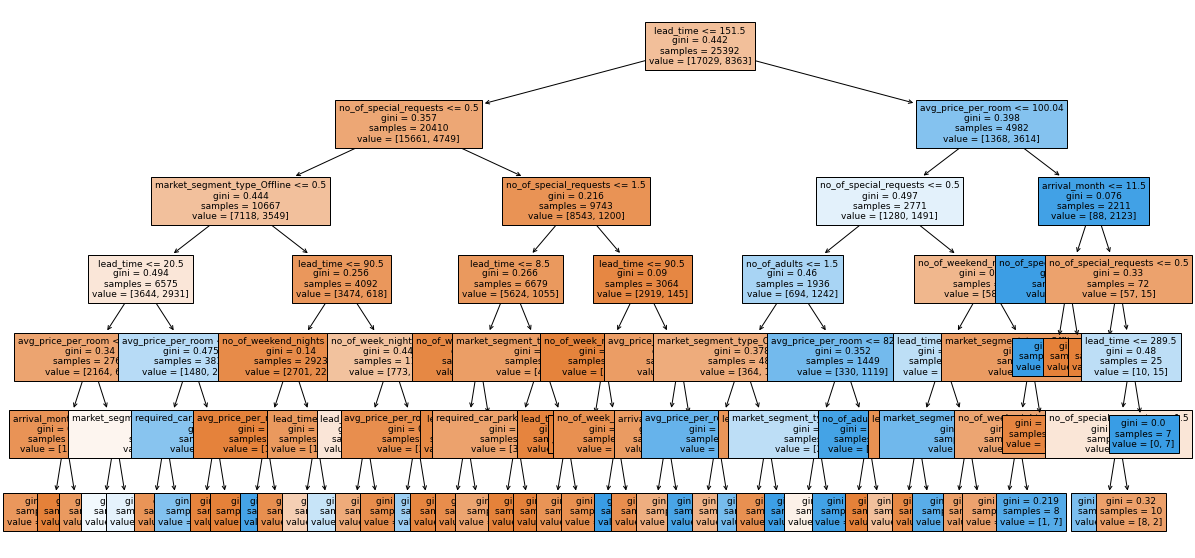

In [93]:
#Plotting decision tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [94]:
#Training data
decision_tree_tune_perf_train = model_performance_classification_statsmodels(
    estimator, X_train4, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.84113,0.73239,0.77326,0.75227


In [95]:
#Test data
decision_tree_tune_perf_test = model_performance_classification_statsmodels(
    estimator, X_test4, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.84251,0.73027,0.77098,0.75007


* The F1 scores between the training and the test data are similiar. Therefore the model is no longer overfitting.
* The model is able to classify 75% of all the data points.
* This is 5% higher than the logistic regression model.
* We will try using the post-pruning method.

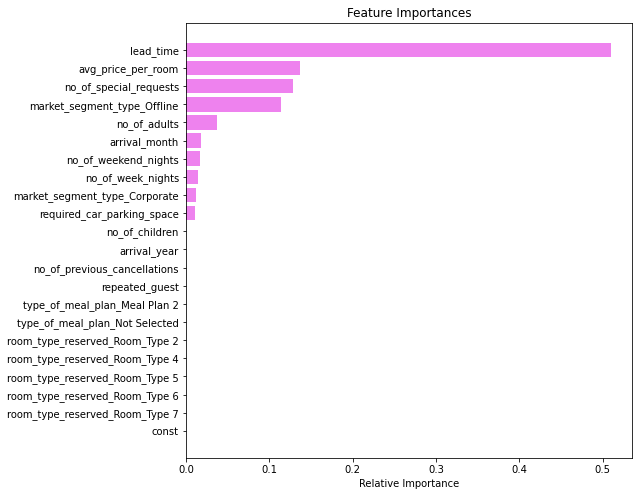

In [96]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time, average price per room, and number of special requests are considered the most important features according to the decision tree.
* There are many features which are not considered relative. For example number of children and arrival year.

### Decision Tree (Post pruning method)

* Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. 
* To get an idea of what values of ``ccp_alpha`` could be appropriate, lets run the following code.

In [97]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train4, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

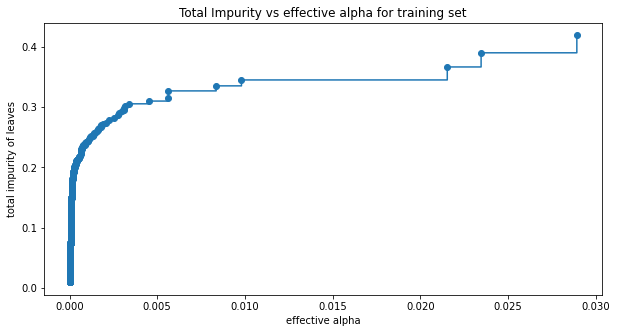

In [98]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [99]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(X_train4, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137021


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

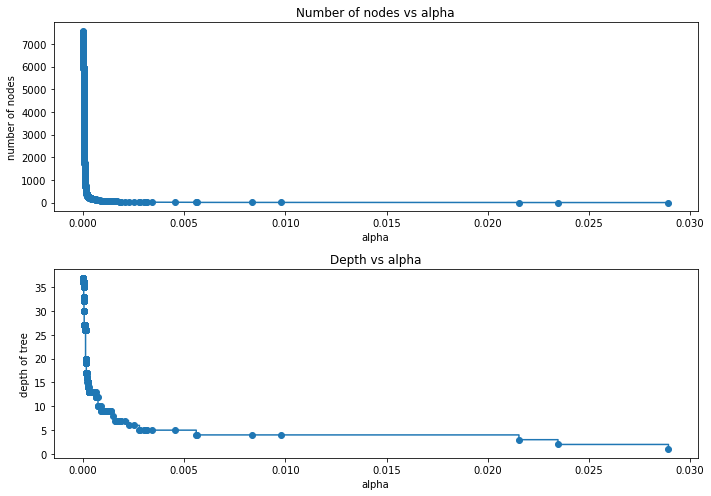

In [100]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [101]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train4)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [102]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test4)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [103]:
train_scores = [clf.score(X_train4, y_train) for clf in clfs]
test_scores = [clf.score(X_test4, y_test) for clf in clfs]

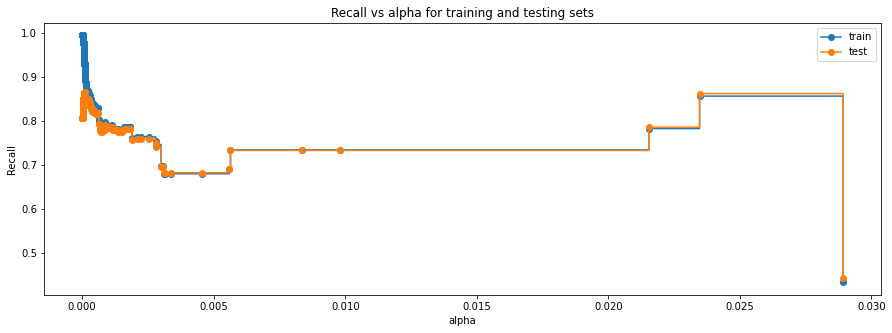

In [104]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [105]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00010078202503745008,
                       class_weight='balanced', random_state=1)


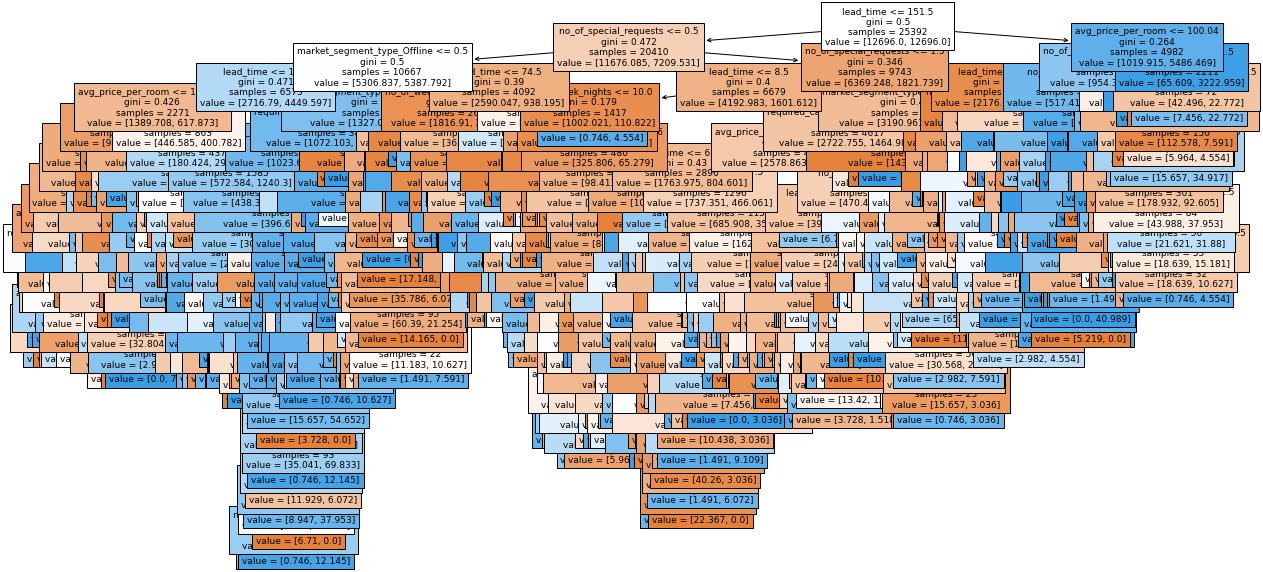

In [106]:
#Visulaizing decision tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [107]:
decision_tree_post_perf_train = model_performance_classification_statsmodels(
    best_model, X_train4, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.90276,0.92407,0.80820,0.86226


In [108]:
decision_tree_post_test = model_performance_classification_statsmodels(
    best_model, X_test4, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86336,0.86485,0.75080,0.80380


* F1 score for the training set is 11% higher compared to the pre-pruning model.
* F1 score for the test set is 5% higher compared to the pre-pruning model.
* However in the post-pruning model, there is a large disparity between the training set and the test set (more than 5%). This suggest overfitting. We will therefore use the pre-pruning model.

In [109]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

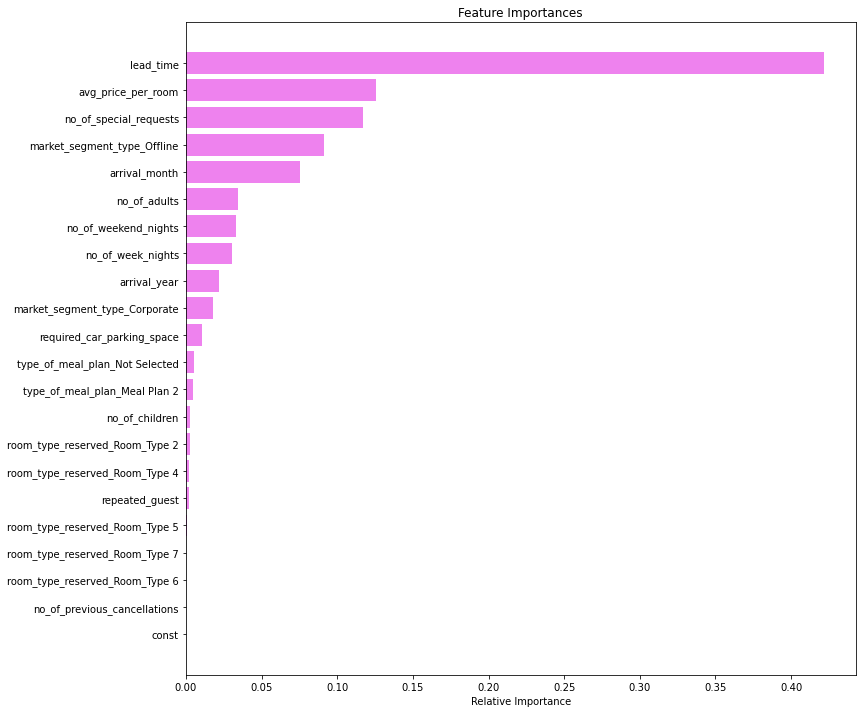

In [110]:
# importance of features in the tree building
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Post-pruning gives the highest importance to lead time, number of previous cancelations, and number of previous bookings not canceled. 
* In the pre-pruning model, importance was given to average price per room and number of special requests. These features are given low importance in the post-pruning model.
* Both models ranked lead time as the most important feature

## Model Performance Comparison and Conclusions

In [111]:
#Training data
decision_tree_tune_perf_train = model_performance_classification_statsmodels(
    estimator, X_train4, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.84113,0.73239,0.77326,0.75227


In [112]:
#Test data
decision_tree_tune_perf_test = model_performance_classification_statsmodels(
    estimator, X_test4, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.84251,0.73027,0.77098,0.75007


### Comments on Decision Tree model
* We have been able to build a predictive model that can be used by INNHotels to identify which customers will cancel their bookings with an f1_score of 0.75 on the training set and the test set.

* The f1_score for the decision tree model was greater than the logistic regression model. It is therefore advised to use the decision tree model.

* The pre-pruning model proved to be the best method. Although the post-pruning model scored better, there were signs of overfitting. We have therefore decided to go with the pre-pruning model as it is more reliable. 

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

#### Observations from EDA:

- Meal Plan 1 (breakfast only) was the most popular choice. 76.7%.
- Most customers do not require a parking space for a car. 96.9%.
- Lead time: bookings are made anywhere between 0 days and over 400 days. Many bookings are made less than 10 days before the booking. Customers who book earlier are more likely to cancel before the arrival date. 
- Most customers arrive in October. 14.7%. Followed by September. 12.7%. The least popular month is January. 2.8%.
- Most customers come from online market segment 64%. Followed by offline. 29%.
- Only 2.6% of customers are returning customers. Repeated guest have a low cancelation rate.
- Median price per room is around 100 euros.
- 32.8% of bookings are canceled before arrival date.
- Online customers are more likely to cancel compared to other market segment types.
- Customers that make special requests when booking are less likely to cancel.
- When the booking is only for 1 guest, the customer is less likely to cancel. 
- Bookings for a long period (more than 5 nights) are more likely to be canceled.
- Booking prices are highest during the months of May to September.

#### Recommendations

- Based on the model, the features that affect cancelations are the following:
        - Lead time
        - Average price per room
        - Number of special requests
        - Market segment type offline
        - Number of adults
        
- Customers who book signficantly in advance are more likely to cancel. A fee for canceling less than a few weeks before the arrival date might disincentive customers from canceling. 
- Peak season is when room prices are highest and also when cancelations are highest. Special prices offered for last minute bookings might help to keep the rooms full.  
- Customers with special requests are less likely to cancel. Offering customers interesting "special services" might entice them to keep their booking.
- Develop incentives for offline bookings as these customers tend to cancel less.
- Returning customers is very low. Only 2.6%. Since returing customers are proven to cancel less, it is suggested to dedicate energy to customer satistication. It is advised to ask customers to leave a rating after their experience. This will help the hotel get a better understanding for how to improve. 